# **Random Forest Regressor**
We can use random forest in two types as:

Random Forest Classifier (for classification tasks)

Random Forest Regressor (for regression tasks)


Here we'll implement and understand random forest regressor by using  the labelled data i.e. both input data and output data are provided to the model so that it can learn from the data and then perform accordingly.

Let's understand random forest regressor with help of a small project that is prediction of laptop prices in following steps:

-  Step 1: Data Preprocessing and Exploration.
-  Step 2: Data Visualization.
-  Step 3: Data Preparation.
-  Step 4: Data Training & Model Creation using random forest regressor algorithm.
-  Step 5: Performance Evaluation by error and accuracy check to find how efficient algorithm performed for this project.


For the dataset being used [click here](https://www.kaggle.com/ionaskel/laptop-prices)

### **Step 1: Data Preprocessing and Exploration.**

In [1]:
#importing pandas library.
import pandas as pd

In [6]:
#loading and reading data through following
data=pd.read_csv('/content/laptops.csv', engine='python')
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [7]:
#to view shape of the dataset i.e. total number of rows and columns.
data.shape

(1303, 13)

In [8]:
#to view first 5 rows of the dataset.
data.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
#to view last 5 rows of the dataset.
data.tail()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [10]:
#to view all the different columns of the dataset.
data.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [11]:
#to view memory usage, non-null values, datatypes of columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [12]:
#to view statistical summary of the dataset.
data.describe()

,Unnamed: 0,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [13]:
#to check for any missing or null values in the dataset.
data.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [14]:
#to view total null values in the dataset.
data.isnull().sum().sum()

0

This means that the dataset has no null values i.e. dataset is cleaned and proper.

We can now proceed with further steps.

### **Step 2: Data Visualization**

In [15]:
# importing libaries for data visualization.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


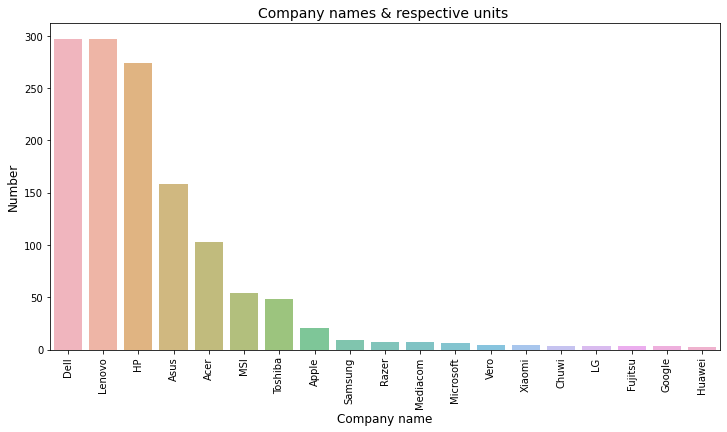

In [17]:
count=data['Company'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('Company name',fontsize=12)
plt.ylabel('Number',fontsize=12)
plt.title('Company names & respective units ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


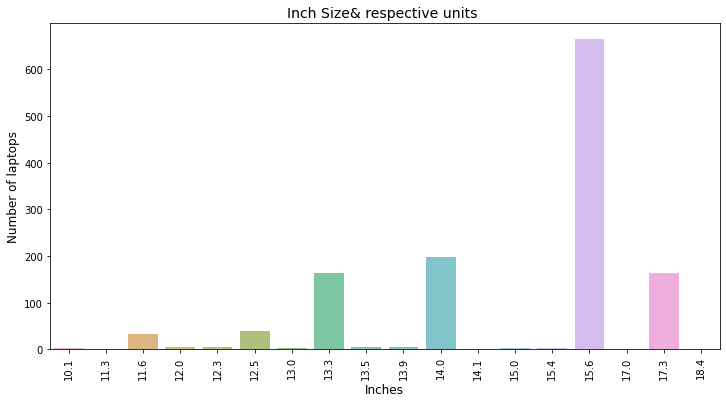

In [19]:
count=data['Inches'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('Inches',fontsize=12)
plt.ylabel('Number of laptops',fontsize=12)
plt.title('Inch Size& respective units ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


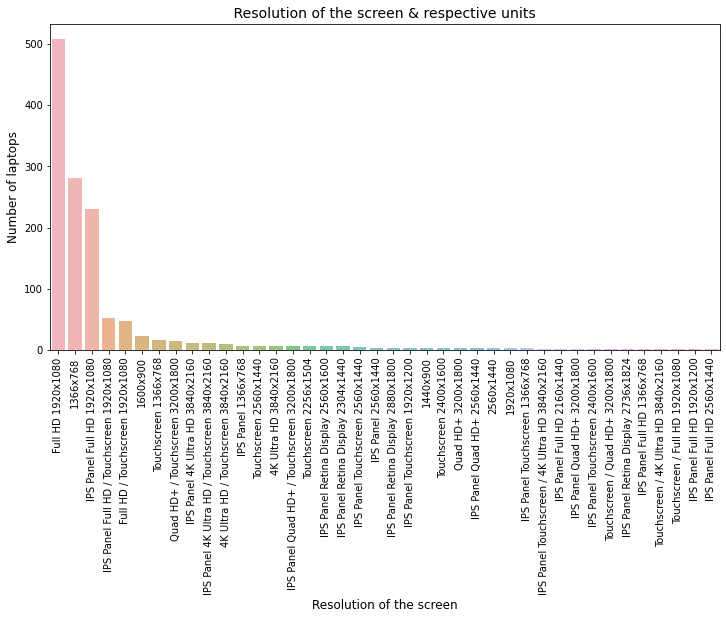

In [20]:
count=data['ScreenResolution'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('Resolution of the screen',fontsize=12)
plt.ylabel('Number of laptops',fontsize=12)
plt.title(' Resolution of the screen & respective units ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


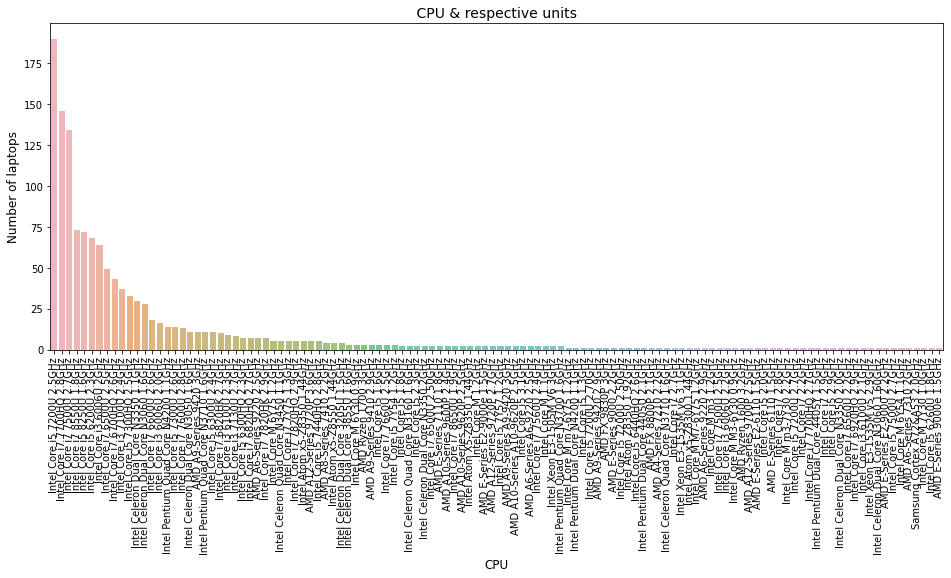

In [24]:
count=data['Cpu'].value_counts()
plt.figure(figsize=(16,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('CPU',fontsize=12)
plt.ylabel('Number of laptops',fontsize=12)
plt.title(' CPU & respective units ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


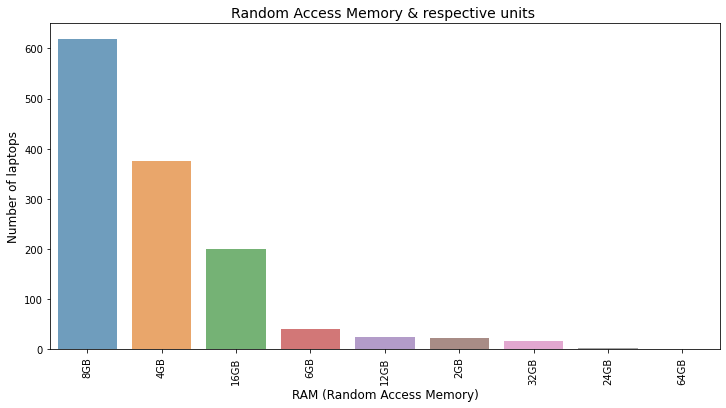

In [25]:
count=data['Ram'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('RAM (Random Access Memory)',fontsize=12)
plt.ylabel('Number of laptops',fontsize=12)
plt.title('Random Access Memory & respective units ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


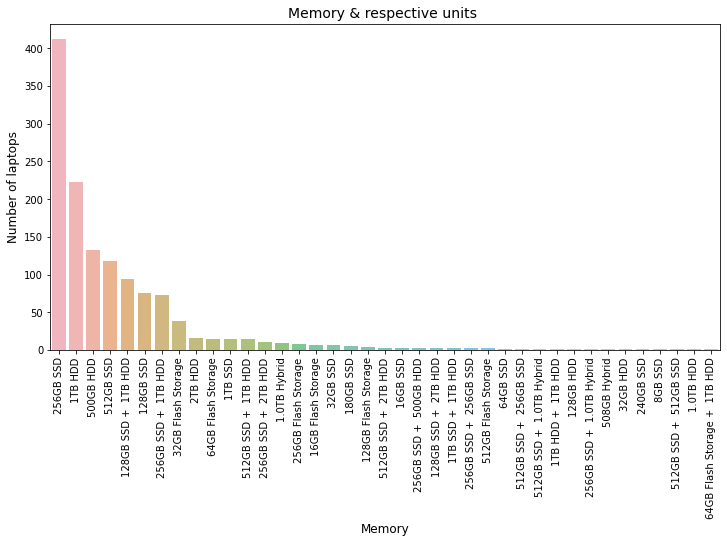

In [26]:
count=data['Memory'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.xlabel('Memory',fontsize=12)
plt.ylabel('Number of laptops',fontsize=12)
plt.title('Memory & respective units ',fontsize=14)
plt.xticks(rotation=90)
plt.show()

Insights drawn from the above visualizations:


*   Most of the laptops are from these three companies- Dell, Lenovo and HP.

*   Maximum Laptops are of 15.6 inches.

*   Resolution of maximum laptops is Full HD 1920x1080.

*   CPU in maximum laptops is Intel core i5.

*   Maximum laptops have RAM of 8 GB.

*   Memory in most of the laptops is 256 GB SSD.



### **Step 3: Data Preparation**

*  This includes preparing data for training and model creation.

*  We have some categorical valued columns, for them we'll convert into numerical columns using get_dummies in pandas.

*  Then drop unwanted columns and proceed to data training.

In [31]:
data.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [38]:
#dropping unwanted columns.
newdata=data.drop(['Unnamed: 0', 'Company', 'Gpu', 'OpSys'],axis=1)
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Weight            1303 non-null   object 
 8   Price_euros       1303 non-null   float64
dtypes: float64(2), object(7)
memory usage: 91.7+ KB


In [39]:
newdata.head()

,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Weight,Price_euros
0,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,1.37kg,1339.69
1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,1.34kg,898.94
2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,1.86kg,575.00
3,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,1.83kg,2537.45
4,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,1.37kg,1803.60


In [58]:
#converting categorical columns into numerical by following:
columns=['Product','TypeName','Ram','Memory']
data1=newdata[columns]
dummies=pd.get_dummies(data1,columns=['Product','TypeName','Ram','Memory'])
dummies

,Product_110-15ACL (A6-7310/4GB/500GB/W10),Product_14-am079na (N3710/8GB/2TB/W10),Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon,Product_15-AY023na (N3710/8GB/2TB/W10),Product_15-BA015wm (E2-7110/4GB/500GB/W10),Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon,Product_15-BS028nv (i3-6006U/4GB/1TB/Radeon,Product_15-BS078nr (i7-7500U/8GB/1TB/W10),Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon,Product_15-BW004nv (A9-9420/4GB/256GB/Radeon,Product_15-BW037na (A9-9420/4GB/1TB/Radeon,Product_15-BW091ND (A9-9420/6GB/1TB,Product_15-BW094nd (A6-9220/8GB/128GB/W10),Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon,Product_15-ba043na (A12-9700P/8GB/2TB/W10),Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10),Product_15-bs005nv (i3-6006U/4GB/1TB,Product_15-bs011nv (i7-7500U/4GB/500GB/Radeon,Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon,Product_15-bs015dx (i5-7200U/8GB/1TB/W10),Product_15-bs017nv (i7-7500U/8GB/256GB/Radeon,Product_15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Product_15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Product_15-bs024nv (i5-7200U/8GB/128GB/W10),Product_15-bs025nv (i5-7200U/8GB/256GB/W10),Product_15-bs053od (i7-7500U/6GB/1TB/W10),Product_15-bs078cl (i7-7500U/8GB/2TB/W10),Product_15-bs190od (i5-8250U/4GB/1TB/W10),Product_15-bw000nv (E2-9000e/4GB/500GB/Radeon,Product_15-bw002nv (A6-9220/4GB/256GB/Radeon,Product_15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10),Product_15-bw007nv (A10-9620P/6GB/128GB/Radeon,Product_15-bw009nv (A12-9720P/6GB/1TB/Radeon,Product_15-bw011nv (A6-9220/4GB/1TB/FHD/W10),Product_15-cb003na (i5-7300HQ/8GB/1TB,Product_15-cd005nv (A9-9420/6GB/256GB/Radeon,Product_15-ra044nv (N3060/4GB/500GB/W10),Product_15-rb013nv (E2-9000e/4GB/500GB/W10),Product_17-AK091ND (A9-9420/8GB/1TB/W10),...,Ram_8GB,Memory_1.0TB HDD,Memory_1.0TB Hybrid,Memory_128GB Flash Storage,Memory_128GB HDD,Memory_128GB SSD,Memory_128GB SSD + 1TB HDD,Memory_128GB SSD + 2TB HDD,Memory_16GB Flash Storage,Memory_16GB SSD,Memory_180GB SSD,Memory_1TB HDD,Memory_1TB HDD + 1TB HDD,Memory_1TB SSD,Memory_1TB SSD + 1TB HDD,Memory_240GB SSD,Memory_256GB Flash Storage,Memory_256GB SSD,Memory_256GB SSD + 1.0TB Hybrid,Memory_256GB SSD + 1TB HDD,Memory_256GB SSD + 256GB SSD,Memory_256GB SSD + 2TB HDD,Memory_256GB SSD + 500GB HDD,Memory_2TB HDD,Memory_32GB Flash Storage,Memory_32GB HDD,Memory_32GB SSD,Memory_500GB HDD,Memory_508GB Hybrid,Memory_512GB Flash Storage,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,0

In [41]:
#Concatenating new numerical columns along with the old dataset.
mergeddata= pd.concat([newdata,dummies],axis='columns')
mergeddata

,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Weight,Price_euros,Product_110-15ACL (A6-7310/4GB/500GB/W10),Product_14-am079na (N3710/8GB/2TB/W10),Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon,Product_15-AY023na (N3710/8GB/2TB/W10),Product_15-BA015wm (E2-7110/4GB/500GB/W10),Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon,Product_15-BS028nv (i3-6006U/4GB/1TB/Radeon,Product_15-BS078nr (i7-7500U/8GB/1TB/W10),Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon,Product_15-BW004nv (A9-9420/4GB/256GB/Radeon,Product_15-BW037na (A9-9420/4GB/1TB/Radeon,Product_15-BW091ND (A9-9420/6GB/1TB,Product_15-BW094nd (A6-9220/8GB/128GB/W10),Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon,Product_15-ba043na (A12-9700P/8GB/2TB/W10),Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10),Product_15-bs005nv (i3-6006U/4GB/1TB,Product_15-bs011nv (i7-7500U/4GB/500GB/Radeon,Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon,Product_15-bs015dx (i5-7200U/8GB/1TB/W10),Product_15-bs017nv (i7-7500U/8GB/256GB/Radeon,Product_15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Product_15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Product_15-bs024nv (i5-7200U/8GB/128GB/W10),Product_15-bs025nv (i5-7200U/8GB/256GB/W10),Product_15-bs053od (i7-7500U/6GB/1TB/W10),Product_15-bs078cl (i7-7500U/8GB/2TB/W10),Product_15-bs190od (i5-8250U/4GB/1TB/W10),Product_15-bw000nv (E2-9000e/4GB/500GB/Radeon,Product_15-bw002nv (A6-9220/4GB/256GB/Radeon,...,Ram_8GB,Memory_1.0TB HDD,Memory_1.0TB Hybrid,Memory_128GB Flash Storage,Memory_128GB HDD,Memory_128GB SSD,Memory_128GB SSD + 1TB HDD,Memory_128GB SSD + 2TB HDD,Memory_16GB Flash Storage,Memory_16GB SSD,Memory_180GB SSD,Memory_1TB HDD,Memory_1TB HDD + 1TB HDD,Memory_1TB SSD,Memory_1TB SSD + 1TB HDD,Memory_240GB SSD,Memory_256GB Flash Storage,Memory_256GB SSD,Memory_256GB SSD + 1.0TB Hybrid,Memory_256GB SSD + 1TB HDD,Memory_256GB SSD + 256GB SSD,Memory_256GB SSD + 2TB HDD,Memory_256GB SSD + 500GB HDD,Memory_2TB HDD,Memory_32GB Flash Storage,Memory_32GB HDD,Memory_32GB SSD,Memory_500GB HDD,Memory_508GB Hybrid,Memory_512GB Flash Storage,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,1.37kg,1339.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,1.34kg,898.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,1.86kg,575.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,1.83kg,2537.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,1.37kg,1803.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x108

In [44]:
#Now drop the categorical columns which are already converted into numerical columns in above steps.
newdata1=mergeddata.drop(['Product','TypeName','Ram','Memory','ScreenResolution','Cpu','Weight'],axis='columns')
newdata1

,Inches,Price_euros,Product_110-15ACL (A6-7310/4GB/500GB/W10),Product_14-am079na (N3710/8GB/2TB/W10),Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon,Product_15-AY023na (N3710/8GB/2TB/W10),Product_15-BA015wm (E2-7110/4GB/500GB/W10),Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon,Product_15-BS028nv (i3-6006U/4GB/1TB/Radeon,Product_15-BS078nr (i7-7500U/8GB/1TB/W10),Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon,Product_15-BW004nv (A9-9420/4GB/256GB/Radeon,Product_15-BW037na (A9-9420/4GB/1TB/Radeon,Product_15-BW091ND (A9-9420/6GB/1TB,Product_15-BW094nd (A6-9220/8GB/128GB/W10),Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon,Product_15-ba043na (A12-9700P/8GB/2TB/W10),Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10),Product_15-bs005nv (i3-6006U/4GB/1TB,Product_15-bs011nv (i7-7500U/4GB/500GB/Radeon,Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon,Product_15-bs015dx (i5-7200U/8GB/1TB/W10),Product_15-bs017nv (i7-7500U/8GB/256GB/Radeon,Product_15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Product_15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Product_15-bs024nv (i5-7200U/8GB/128GB/W10),Product_15-bs025nv (i5-7200U/8GB/256GB/W10),Product_15-bs053od (i7-7500U/6GB/1TB/W10),Product_15-bs078cl (i7-7500U/8GB/2TB/W10),Product_15-bs190od (i5-8250U/4GB/1TB/W10),Product_15-bw000nv (E2-9000e/4GB/500GB/Radeon,Product_15-bw002nv (A6-9220/4GB/256GB/Radeon,Product_15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10),Product_15-bw007nv (A10-9620P/6GB/128GB/Radeon,Product_15-bw009nv (A12-9720P/6GB/1TB/Radeon,Product_15-bw011nv (A6-9220/4GB/1TB/FHD/W10),Product_15-cb003na (i5-7300HQ/8GB/1TB,Product_15-cd005nv (A9-9420/6GB/256GB/Radeon,Product_15-ra044nv (N3060/4GB/500GB/W10),...,Ram_8GB,Memory_1.0TB HDD,Memory_1.0TB Hybrid,Memory_128GB Flash Storage,Memory_128GB HDD,Memory_128GB SSD,Memory_128GB SSD + 1TB HDD,Memory_128GB SSD + 2TB HDD,Memory_16GB Flash Storage,Memory_16GB SSD,Memory_180GB SSD,Memory_1TB HDD,Memory_1TB HDD + 1TB HDD,Memory_1TB SSD,Memory_1TB SSD + 1TB HDD,Memory_240GB SSD,Memory_256GB Flash Storage,Memory_256GB SSD,Memory_256GB SSD + 1.0TB Hybrid,Memory_256GB SSD + 1TB HDD,Memory_256GB SSD + 256GB SSD,Memory_256GB SSD + 2TB HDD,Memory_256GB SSD + 500GB HDD,Memory_2TB HDD,Memory_32GB Flash Storage,Memory_32GB HDD,Memory_32GB SSD,Memory_500GB HDD,Memory_508GB Hybrid,Memory_512GB Flash Storage,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,13.3,1339.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13.3,898.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15.6,575.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15.4,2537.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,13.3,1803.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,638.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1299,13.3,1499.00,0,0,0,0,0,0,0,0,0,0,0,0

In [47]:
#converting data into int datatype to avoid errors below.
prepareddata=newdata1.astype(int)
prepareddata.head()

,Inches,Price_euros,Product_110-15ACL (A6-7310/4GB/500GB/W10),Product_14-am079na (N3710/8GB/2TB/W10),Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon,Product_15-AY023na (N3710/8GB/2TB/W10),Product_15-BA015wm (E2-7110/4GB/500GB/W10),Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon,Product_15-BS028nv (i3-6006U/4GB/1TB/Radeon,Product_15-BS078nr (i7-7500U/8GB/1TB/W10),Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10),Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon,Product_15-BW004nv (A9-9420/4GB/256GB/Radeon,Product_15-BW037na (A9-9420/4GB/1TB/Radeon,Product_15-BW091ND (A9-9420/6GB/1TB,Product_15-BW094nd (A6-9220/8GB/128GB/W10),Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon,Product_15-ba043na (A12-9700P/8GB/2TB/W10),Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10),Product_15-bs005nv (i3-6006U/4GB/1TB,Product_15-bs011nv (i7-7500U/4GB/500GB/Radeon,Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon,Product_15-bs015dx (i5-7200U/8GB/1TB/W10),Product_15-bs017nv (i7-7500U/8GB/256GB/Radeon,Product_15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Product_15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Product_15-bs024nv (i5-7200U/8GB/128GB/W10),Product_15-bs025nv (i5-7200U/8GB/256GB/W10),Product_15-bs053od (i7-7500U/6GB/1TB/W10),Product_15-bs078cl (i7-7500U/8GB/2TB/W10),Product_15-bs190od (i5-8250U/4GB/1TB/W10),Product_15-bw000nv (E2-9000e/4GB/500GB/Radeon,Product_15-bw002nv (A6-9220/4GB/256GB/Radeon,Product_15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10),Product_15-bw007nv (A10-9620P/6GB/128GB/Radeon,Product_15-bw009nv (A12-9720P/6GB/1TB/Radeon,Product_15-bw011nv (A6-9220/4GB/1TB/FHD/W10),Product_15-cb003na (i5-7300HQ/8GB/1TB,Product_15-cd005nv (A9-9420/6GB/256GB/Radeon,Product_15-ra044nv (N3060/4GB/500GB/W10),...,Ram_8GB,Memory_1.0TB HDD,Memory_1.0TB Hybrid,Memory_128GB Flash Storage,Memory_128GB HDD,Memory_128GB SSD,Memory_128GB SSD + 1TB HDD,Memory_128GB SSD + 2TB HDD,Memory_16GB Flash Storage,Memory_16GB SSD,Memory_180GB SSD,Memory_1TB HDD,Memory_1TB HDD + 1TB HDD,Memory_1TB SSD,Memory_1TB SSD + 1TB HDD,Memory_240GB SSD,Memory_256GB Flash Storage,Memory_256GB SSD,Memory_256GB SSD + 1.0TB Hybrid,Memory_256GB SSD + 1TB HDD,Memory_256GB SSD + 256GB SSD,Memory_256GB SSD + 2TB HDD,Memory_256GB SSD + 500GB HDD,Memory_2TB HDD,Memory_32GB Flash Storage,Memory_32GB HDD,Memory_32GB SSD,Memory_500GB HDD,Memory_508GB Hybrid,Memory_512GB Flash Storage,Memory_512GB SSD,Memory_512GB SSD + 1.0TB Hybrid,Memory_512GB SSD + 1TB HDD,Memory_512GB SSD + 256GB SSD,Memory_512GB SSD + 2TB HDD,Memory_512GB SSD + 512GB SSD,Memory_64GB Flash Storage,Memory_64GB Flash Storage + 1TB HDD,Memory_64GB SSD,Memory_8GB SSD
0,13,1339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,2537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,13,1803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Step 4: Data Training & Model Creation**

Data training:

In [50]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have feature and y will have our target.
x=prepareddata.drop(['Price_euros'],axis=1)  
y=prepareddata['Price_euros']

In [51]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=500) 
#Ratio used for splitting training and testing data is 8:2 respectively

Model Creation:

In [52]:
#Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
reg1 = RandomForestRegressor(n_estimators=100)

In [53]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
#making predictions.
pred1 = reg1.predict(x_test)

In [56]:
pred1

array([ 645.13508333,  300.11666667,  554.93      , 1035.364     ,
       1451.00412557, 1785.07416667,  526.12      , 1033.018     ,
        463.39      , 2436.76      , 3614.32583333, 2070.81      ,
       1765.28      ,  515.1       , 1451.00412557, 1010.64333333,
       1966.13      , 1283.951     , 1592.43166667, 1737.63416667,
        688.33444444, 1228.67916667, 1519.7       ,  843.75333333,
        654.60350758, 1211.10416667,  724.59395238, 2341.518     ,
       1100.2505    , 1028.67220238, 1955.63666667,  924.98876623,
        444.73361111,  605.58611111, 1211.13416667, 1165.9425    ,
        308.95666667, 1112.393     ,  446.55      , 1207.74      ,
        327.56025   , 2077.31      ,  783.1225    , 1762.06833333,
        986.515     ,  650.88322367, 1247.38983333,  849.50707143,
        794.86      , 1900.06416667, 1689.75266667, 1100.2505    ,
        701.54244444, 2137.92      , 1173.954     , 2291.338     ,
       1546.6442619 , 1373.3125    ,  863.67      ,  782.08   

These above are the predicted prices of laptops.

### **Step 5: Performance Evaluation**

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t    Accuracy of the model") 
print("""Random Forest Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))

Model			          RootMeanSquareError  		    Accuracy of the model
Random Forest Regressor 		 316.6178 	 		 0.9563


Conclusion:



*   For this Laptop prices prediction project, the accuracy of random forest regressor is 95.63 % which is really a good accuracy.


*   Random Forest regressor is one of the efficient models in machine learning.

*   It can be used for prediction projects, basically for regression tasks.